In [1]:
#execute this cell, then press 'Restart and clear cell outputs' and execute all cells except this
!pip install -U tensorflow==2.12.0rc0
!pip install -U numpy==1.18.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.8/585.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully un

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install contractions
!pip install vaderSentiment
!pip install sweetviz
!pip install textblob

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import contractions
import sweetviz as sv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import time

#importing the Lemming function from nltk library
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.1 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Direct Search Posts

In [4]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [5]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [6]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

## Filtered Search

In [7]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [8]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

In [9]:
reddit_posts_checked = pd.concat([reddit_filtered_posts_checked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_checked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_checked.head()

,content,Manual Evaluation
0,My wife's cookies were probably session hijack...,0
1,HTML Smuggling Leads to Domain Wide Ransomware.,1
2,I need help with a potential virus. I need hel...,1
3,"Aura question. I have a question, is Aura a go...",0
4,Need help ruining a scam that uses Google ads ...,1


In [10]:
reddit_posts_unchecked = pd.concat([reddit_filtered_posts_unchecked[[ 'content', 'Manual Evaluation' ]], reddit_direct_posts_unchecked[[ 'content', 'Manual Evaluation' ]]])

reddit_posts_unchecked.head()

,content,Manual Evaluation
1001,"Hello, I need help in windows 11. My right cli...",0
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0
1003,Anyone else got an extension flagged as trojan...,0
1004,Do I need antivirus?. So it's been upwards of ...,0
1005,Windows detecting Trojans after clean install ...,0


In [11]:
reddit_posts_checked.rename(columns={  'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)
reddit_posts_unchecked.rename(columns={'Manual Evaluation': 'Related', 'content' : 'full_text'}, inplace=True)

In [12]:
reddit_posts_checked

,full_text,Related
0,My wife's cookies were probably session hijack...,0
1,HTML Smuggling Leads to Domain Wide Ransomware.,1
2,I need help with a potential virus. I need hel...,1
3,"Aura question. I have a question, is Aura a go...",0
4,Need help ruining a scam that uses Google ads ...,1
...,...,...
1008,Network Error While downloading over ethernet....,0
1009,"Unknown X Reveals Touhou Dungeon Maker Game, T...",0
1010,Email attachment size shows less size in the e...,0
1011,Path gets forwarded with quotation marks. Hell...,0


In [13]:
reddit_posts_unchecked

,full_text,Related
1001,"Hello, I need help in windows 11. My right cli...",0
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0
1003,Anyone else got an extension flagged as trojan...,0
1004,Do I need antivirus?. So it's been upwards of ...,0
1005,Windows detecting Trojans after clean install ...,0
...,...,...
5084,ReconAfrica Annual General Meeting - Inaugural...,0
5085,Cannot find cause of blocked network traffic. ...,0
5086,Cant open gta 5 or any rockstar title or even ...,0
5087,What's something you learned after years of be...,0


## CS AWARE CLEANED

In [14]:
dir_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/cs_aware_cleaned_text.csv'

cs_aware_cleaned_text = pd.read_csv(dir_cs_aware_cleaned_text)
print(cs_aware_cleaned_text.shape)

(17792, 4)


In [15]:
dir_not_cs_aware_cleaned_text = '/content/gdrive/MyDrive/RelevanceAnalysis/not_cs_aware_cleaned_text.csv'

not_cs_aware_cleaned_text = pd.read_csv(dir_not_cs_aware_cleaned_text)
print(not_cs_aware_cleaned_text.shape)

(7020, 6)


In [16]:
cs_aware_cleaned_text = cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)
not_cs_aware_cleaned_text = not_cs_aware_cleaned_text.drop(['Unnamed: 0'], axis = 1)

In [17]:
cs_aware_cleaned_text

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
17787,healthcare and publichealth sector organizatio...,en,1
17788,do not give an attacker the opportunity to tak...,en,1
17789,check out cisagov s redeye it is an interactiv...,en,1
17790,cisagov s known exploited vulnerabilities cata...,en,1


tokenize + embeddings

In [18]:
# pip install --upgrade tensorflow

In [19]:
!pip install keras-tuner
!pip install --upgrade paramiko cryptography


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: cryptography
    Found existing installation: cryptography 42.0.0
    Uninstalling cryptography-42.0.0:
      Successfully uninstalled cryptography-42.0.0


In [20]:
import numpy as np
import pandas as pd
import os
import json
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import np_utils
from tensorflow.keras.preprocessing import sequence, text
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn import preprocessing

import nltk # NLP
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

#Tuner
from keras_tuner.tuners import RandomSearch


In [22]:
# seed initialization
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

In [23]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [24]:
df = pd.concat([cs_aware_cleaned_text, reddit_posts_checked, not_cs_aware_cleaned_text[['full_text', 'Related']]])
df

,full_text,lang,Related
0,non transparent sharing of branch predictor se...,en,1
1,non transparent sharing of branch predictor wi...,en,1
2,hardware debug modes and processor init settin...,en,1
3,sensitive information accessible by physical p...,en,1
4,pan os software provides options to exclude sp...,en,1
...,...,...,...
7015,tohkkis i draw s stick men w or l offer,NaN,0
7016,it was in some such fashion that the world spo...,NaN,0
7017,goog afternoon guys who wants to support my...,NaN,0
7018,robinhanson not convenient nor liquid in low ...,NaN,0


<Axes: title={'center': 'Percentage of Labels'}, ylabel='Related'>

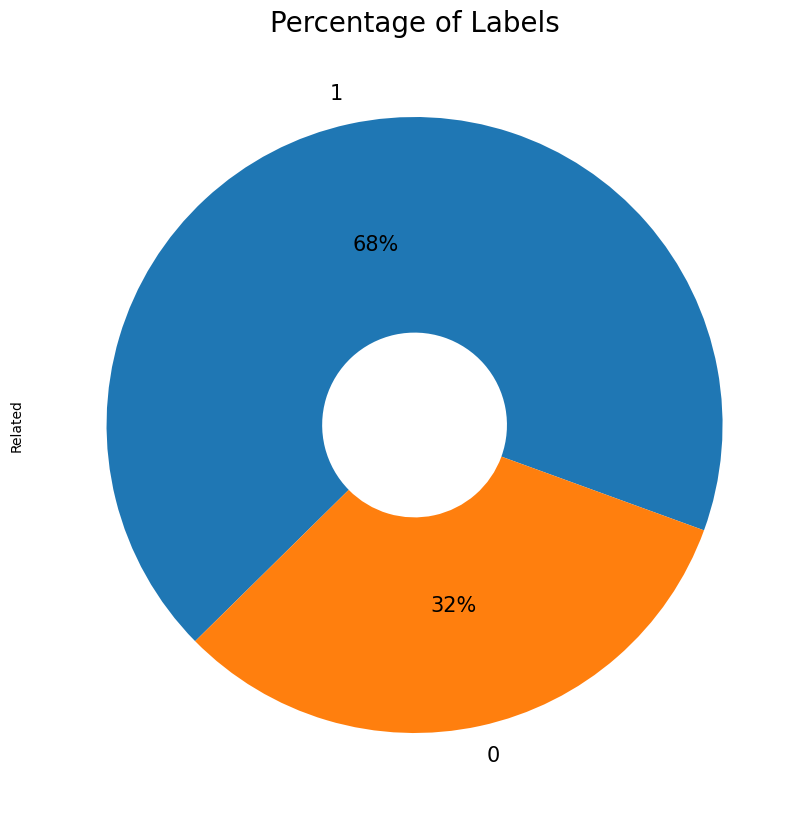

In [25]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Labels', fontsize=20)
df.Related.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

In [26]:
df = df.drop_duplicates(subset=['full_text']).reset_index(drop = True)
print(df)
df.to_csv('cs_aware.csv')

                                               full_text lang  Related
0      non transparent sharing of branch predictor se...   en        1
1      non transparent sharing of branch predictor wi...   en        1
2      hardware debug modes and processor init settin...   en        1
3      sensitive information accessible by physical p...   en        1
4      pan os software provides options to exclude sp...   en        1
...                                                  ...  ...      ...
25661          tohkkis i draw   s stick men w or l offer  NaN        0
25662  it was in some such fashion that the world spo...  NaN        0
25663  goog afternoon   guys  who wants to support my...  NaN        0
25664   robinhanson not convenient nor liquid in low ...  NaN        0
25665  this really just paid my rent    chrissypodola...  NaN        0

[25666 rows x 3 columns]


LASER

In [27]:
!pip install torch==2.1.0

In [28]:
!pip install -q laserembeddings==1.1.2
!pip install -q ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.8/859.8 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 862.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 53.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.13.1 which is incompatible.
torchtext 0.16.0 requires 

In [29]:
!pip install fastcache
# import fasttext
import ftfy
import html
import laserembeddings
import sys

from fastcache import clru_cache
from laserembeddings import Laser
from typing import List, Union
from urllib.parse import unquote

  Preparing metadata (setup.py) ... done
  Created wheel for fastcache: filename=fastcache-1.1.0-cp310-cp310-linux_x86_64.whl size=42962 sha256=e9f6d204101261a1891eda1d3e543e2a578450cb8e59b79e742e61175f247b7f
  Stored in directory: /root/.cache/pip/wheels/f5/ea/fc/eebb4e5d80ccd0da9db419de1e9b156c9c2875b5d394727aff
Successfully built fastcache


****LASER Embeddings****
This encodes each of the strings as a LASER embedding (1024 dimentional vector)

In [30]:
%%bash
# DOCS: https://github.com/facebookresearch/LASER/blob/master/install_models.sh
mkdir -p models/laser/
# for FILE in bilstm.eparl21.2018-11-19.pt eparl21.fcodes eparl21.fvocab bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
for FILE in bilstm.93langs.2018-12-26.pt 93langs.fcodes 93langs.fvocab; do
    wget -cq https://dl.fbaipublicfiles.com/laser/models/$FILE -O models/laser/$FILE
done

In [31]:
!pip install config
#from src.utils.fasttest_model import language_detect
# from src.utils.punkt_tokenizer import punkt_tokenize_sentences

config = {
    "laser": {
        "base_dir":  "./models/laser",
        "bpe_codes": "./models/laser/93langs.fcodes",
        "bpe_vocab": "./models/laser/93langs.fvocab",
        "encoder":   "./models/laser/bilstm.93langs.2018-12-26.pt",
    }
}

In [32]:
# Instantiate encoder
# BUG: CUDA GPU memory is exceeded if both laser and labse are loaded together
# @clru_cache(None)
def get_laser_model():
    laser_model = Laser(
        bpe_codes = config['laser']['bpe_codes'],
        bpe_vocab = config['laser']['bpe_vocab'],
        encoder   = config['laser']['encoder'],
        tokenizer_options = None,
        embedding_options = None
    )
    return laser_model

def laser_encode(text: Union[str, List[str]], lang='autodetect', normalize=True) -> np.ndarray:
    """
    Encodes a corpus of text using LASER
    :param text: Large block of text (will be tokenized), or list of pre-tokenized sentences
    :param lang: 2 digit language code (optional autodetect)
    :return:     embedding matrix
    """
    laser_model = get_laser_model()

    if isinstance(text, str):
        # sentences = punkt_tokenize_sentences(text, lang=lang)
        sentences = ['text']

    else:
        sentences = list(text)

    embedding = laser_model.embed_sentences(sentences, lang=lang)

    if normalize:
        embedding = embedding / np.sqrt(np.sum(embedding**2, axis=1)).reshape(-1,1)

    return embedding

THE MODEL

In [33]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import Precision, Recall

# lb = LabelBinarizer()

train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10

# train_test split: test 30%
X_train, X_test, y_train, y_test = train_test_split(df['full_text'], df['Related'], test_size=0.3, random_state=0)

#test is 10% of the initial dataset, val 20%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(17966,)
(5133,)
(2567,)


In [34]:
print('Training text lenght: ', len(X_train))
print('Validation text: ', len(X_val))
print('Testing text: ',len(X_test))

Training text lenght:  17966
Validation text:  5133
Testing text:  2567


In [35]:
X_train =laser_encode(X_train)
X_val = laser_encode(X_val)
X_test = laser_encode(X_test)

In [36]:
print('X_train.shape', X_train.shape)
print('Y_train.shape', y_train.shape)

X_train.shape (17966, 1024)
Y_train.shape (17966,)


In [37]:
X_train

array([[ 7.6566483e-03,  1.6672720e-04, -6.4519541e-03, ...,
         3.0558096e-02,  1.3510884e-02,  6.5675743e-02],
       [ 1.5561893e-02, -1.3745511e-05, -7.9620676e-04, ...,
         4.7991041e-02,  1.5796172e-02,  4.2924929e-02],
       [ 8.0104088e-03,  2.4574761e-06,  4.5110015e-03, ...,
         1.2620567e-02,  3.3446468e-02,  2.5042830e-02],
       ...,
       [ 1.4055405e-02,  6.0678307e-02,  3.7642582e-03, ...,
         5.6564409e-02,  1.2293075e-02,  6.6720739e-02],
       [ 1.8614290e-02, -4.6545261e-05, -6.5220720e-03, ...,
         8.7758573e-03,  3.5723731e-02,  3.6529262e-02],
       [ 2.3237573e-02, -5.1373208e-05, -3.6489207e-03, ...,
         3.7070971e-02,  2.6943969e-02,  2.4916012e-02]], dtype=float32)

In [38]:
y_train

7107     1
20083    0
1470     1
25271    0
20544    0
        ..
13123    1
19648    0
9845     1
10799    1
2732     1
Name: Related, Length: 17966, dtype: int64

In [39]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(17966, 1024)
(5133, 1024)
(2567, 1024)


In [40]:
max_len = 1024


> Neural Network - TF Keras

This inputs a 1024 LASER embedding and outputs a 1 bit classification prediction.

A triangular shaped architecture is used, including Dropout and BatchNorm.

2022/07/06 Updated LASER models with support for over 200 languages

In [41]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.7 MB/s eta 0:00:00


In [42]:
import tensorflow as tf
import tensorflow_addons as tfa


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.13.0 and strictly below 2.16.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you'

In [43]:
# Build the model

accuracy_metric = tf.keras.metrics.BinaryAccuracy()
precision_metric = Precision()
recall_metric = Recall()
f1_score_metric = tfa.metrics.F1Score(num_classes=1, threshold=0.5)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1024,)),
    tf.keras.layers.Dense(512, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              metrics =  [ accuracy_metric, precision_metric, recall_metric, f1_score_metric ])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [44]:
epochs = 1000
batch_size = 32

In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)


In [46]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1,
                    validation_data=([X_val, y_val]),
                    callbacks=callback)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


562/562 [==============================] - 22s 27ms/step - loss: 0.6207 - binary_accuracy: 0.6831 - precision: 0.8325 - recall: 0.6659 - f1_score: 0.7399 - val_loss: 0.4180 - val_binary_accuracy: 0.9012 - val_precision: 0.9328 - val_recall: 0.9202 - val_f1_score: 0.9265
Epoch 2/1000
562/562 [==============================] - 15s 27ms/step - loss: 0.4465 - binary_accuracy: 0.8058 - precision: 0.9246 - recall: 0.7765 - f1_score: 0.8441 - val_loss: 0.2853 - val_binary_accuracy: 0.9312 - val_precision: 0.9854 - val_recall: 0.9118 - val_f1_score: 0.9472
Epoch 3/1000
562/562 [==============================] - 14s 25ms/step - loss: 0.3839 - binary_accuracy: 0.8506 - precision: 0.9519 - recall: 0.8209 - f1_score: 0.8815 - val_loss: 0.2612 - val_binary_accuracy: 0.9410 - val_precision: 0.9889 - val_recall: 0.9231 - val_f1_score: 0.9549
Epoch 4/1000
562/562 [==============================] - 11s 20ms/step - loss: 0.3526 - binary_accuracy: 0.8738 - precision: 0.9585 - recall: 0.8505 - f1_score: 0

In [47]:
model.evaluate(X_test, y_test, verbose =1)


81/81 [==============================] - 0s 4ms/step - loss: 0.0839 - binary_accuracy: 0.9700 - precision: 0.9828 - recall: 0.9718 - f1_score: 0.9773


[0.08385761827230453,
 0.9700039029121399,
 0.9827995300292969,
 0.9718475341796875,
 array([0.97729284], dtype=float32)]

In [48]:
print(history.history.keys())


dict_keys(['loss', 'binary_accuracy', 'precision', 'recall', 'f1_score', 'val_loss', 'val_binary_accuracy', 'val_precision', 'val_recall', 'val_f1_score'])


In [49]:
    print('Train Accuracy')
    model.evaluate(X_train, y_train)

    print('Test Accuracy')
    model.evaluate(X_test, y_test)

Train Accuracy
562/562 [==============================] - 2s 4ms/step - loss: 0.0221 - binary_accuracy: 0.9948 - precision: 0.9978 - recall: 0.9946 - f1_score: 0.9962
Test Accuracy
81/81 [==============================] - 0s 4ms/step - loss: 0.0839 - binary_accuracy: 0.9700 - precision: 0.9828 - recall: 0.9718 - f1_score: 0.9773


[0.08385761827230453,
 0.9700039029121399,
 0.9827995300292969,
 0.9718475341796875,
 array([0.97729284], dtype=float32)]

In [50]:
history.history['binary_accuracy']

[0.683068037033081,
 0.8057998418807983,
 0.8506066799163818,
 0.8738172054290771,
 0.8925748467445374,
 0.9071022868156433,
 0.9147834777832031,
 0.9197372794151306,
 0.9285316467285156,
 0.9340977668762207,
 0.9379940032958984,
 0.938327968120575,
 0.9410552978515625,
 0.9432260990142822,
 0.9468997120857239,
 0.949126124382019,
 0.950239360332489,
 0.95374596118927,
 0.9538573026657104,
 0.9553044438362122,
 0.9577535390853882,
 0.9584214687347412,
 0.9581988453865051,
 0.9598129987716675,
 0.9599242806434631,
 0.9595903158187866,
 0.9607592225074768,
 0.9630969762802124,
 0.9640432000160217,
 0.9655460119247437,
 0.9632639288902283,
 0.9630413055419922,
 0.9663809537887573,
 0.9666035771369934,
 0.9645997881889343,
 0.9660469889640808,
 0.9674941301345825,
 0.9656016826629639,
 0.9688856601715088,
 0.9679394364356995,
 0.9702771902084351,
 0.9683290719985962,
 0.9706111550331116,
 0.971390426158905,
 0.971112072467804,
 0.970054566860199,
 0.9720026850700378,
 0.9697206020355225,
 

In [51]:
model.save('/content/gdrive/MyDrive/RelevanceAnalysis/NewUnbalanced_laser2.h5')


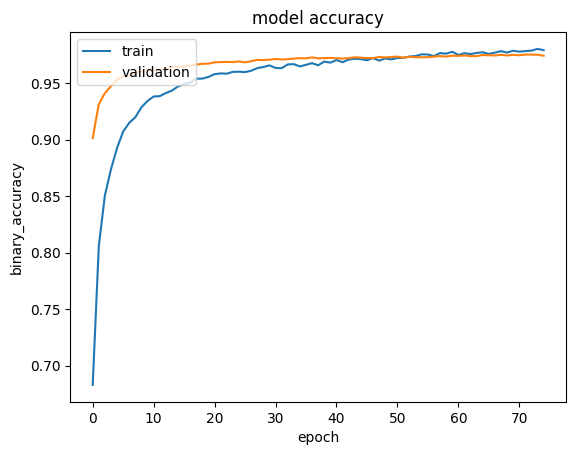

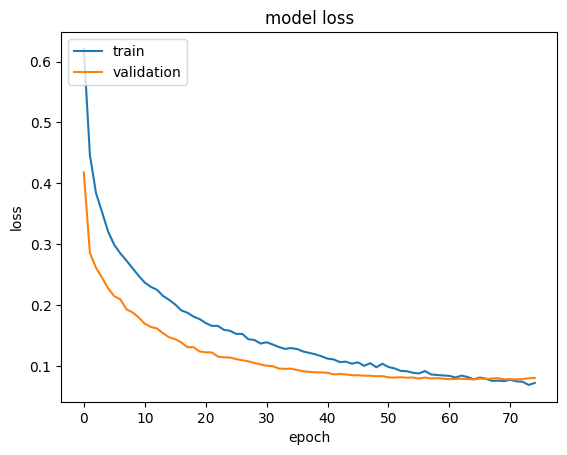

In [52]:
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('binary_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [54]:
prediction = model.predict(X_test)
# show the inputs and predicted outputs
#for i in range(len(X_test)):
print("X=%s, Predicted=%s" % (X_test[0], prediction[0]))

81/81 [==============================] - 1s 3ms/step
X=[ 1.8750630e-02 -1.6193040e-05 -6.6532600e-03 ...  2.4269924e-02
  1.7691819e-02  3.9585035e-02], Predicted=[0.98767966]


In [55]:
for i in range(len(prediction)):
    if (prediction[i] < 0.5):
        prediction[i] = 0
    else:
        prediction[i] = 1

In [56]:
matrix = confusion_matrix(y_test, prediction)
print(matrix)
#The diagonal entries are the accuracies of each class
matrix.diagonal()/matrix.sum(axis=1)

[[ 833   29]
 [  48 1657]]


array([0.96635731, 0.97184751])

In [57]:
# from mlxtend.evaluate import accuracy_score

# std_acc = accuracy_score(y_test, prediction)
# bin_acc = accuracy_score(y_test, prediction, method='binary', pos_label=1)
# avg_acc = accuracy_score(y_test, prediction, method='average')

# print(f'Standard accuracy: {std_acc*100:.2f}%')
# # print(f'Class 1 accuracy: {bin_acc*100:.2f}%')
# print(f'Average per-class accuracy: {avg_acc*100:.2f}%')

In [58]:
# # Evaluate the model on the test data using `evaluate`
# print("Evaluate on test data")
# results = model.evaluate(X_test, y_test, batch_size=128)
# print("test loss, test acc:", results)

# Try to Apply the trained model to new Data

In [59]:
test = laser_encode(reddit_posts_unchecked['full_text'])

In [60]:
new_predictions = model.predict(test)

# Aggiungi le predizioni al dataframe originale
reddit_posts_unchecked['relvance unbalanced model'] = new_predictions
reddit_posts_unchecked
# Salva i risultati in un nuovo file CSV
#reddit_posts_df.to_csv('risultati_predizione.csv', index=False)

137/137 [==============================] - 0s 3ms/step


,full_text,Related,relvance unbalanced model
1001,"Hello, I need help in windows 11. My right cli...",0,0.069492
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0,0.346916
1003,Anyone else got an extension flagged as trojan...,0,0.002418
1004,Do I need antivirus?. So it's been upwards of ...,0,0.098302
1005,Windows detecting Trojans after clean install ...,0,0.064720
...,...,...,...
5084,ReconAfrica Annual General Meeting - Inaugural...,0,0.030851
5085,Cannot find cause of blocked network traffic. ...,0,0.007910
5086,Cant open gta 5 or any rockstar title or even ...,0,0.003994
5087,What's something you learned after years of be...,0,0.030053


In [61]:
for i in range(len(new_predictions)):
    if (new_predictions[i] < 0.5):
        new_predictions[i] = 0
    else:
        new_predictions[i] = 1

In [62]:
reddit_posts_unchecked['RELEVANCE _ UNBALANCED MODEL'] = new_predictions
reddit_posts_unchecked

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL
1001,"Hello, I need help in windows 11. My right cli...",0,0.069492,0.0
1002,"Maldet flagged as trojan. Hey,\n\nthe maldet a...",0,0.346916,0.0
1003,Anyone else got an extension flagged as trojan...,0,0.002418,0.0
1004,Do I need antivirus?. So it's been upwards of ...,0,0.098302,0.0
1005,Windows detecting Trojans after clean install ...,0,0.064720,0.0
...,...,...,...,...
5084,ReconAfrica Annual General Meeting - Inaugural...,0,0.030851,0.0
5085,Cannot find cause of blocked network traffic. ...,0,0.007910,0.0
5086,Cant open gta 5 or any rockstar title or even ...,0,0.003994,0.0
5087,What's something you learned after years of be...,0,0.030053,0.0


In [63]:
neg = len(reddit_posts_unchecked[reddit_posts_unchecked['RELEVANCE _ UNBALANCED MODEL'] == 0.0])
pos = len(reddit_posts_unchecked[reddit_posts_unchecked['RELEVANCE _ UNBALANCED MODEL'] == 1.0])

ratio = pos / ( neg + pos )

print(f'Relevance Ratio: {ratio}')

Relevance Ratio: 0.10075566750629723


In [64]:
reddit_posts_unchecked['Checked'] = 0
reddit_posts_unchecked['Manual Evaluation'] = 0


In [65]:
reddit_posts_unchecked = reddit_posts_unchecked.sample(frac=1).reset_index(drop=True)
reddit_posts_unchecked

,full_text,Related,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,Checked,Manual Evaluation
0,"TIL that the precursor to LASIK, Radial Kerato...",0,0.907081,1.0,0,0
1,False Detection?. I ran Addictive Keys' Librar...,0,0.539925,1.0,0,0
2,"The mysterious registry, why is it impossible ...",0,0.011895,0.0,0,0
3,Why is individual DSC required for ITR filing?...,0,0.145412,0.0,0,0
4,Warren the White Shark has been detected at th...,0,0.602461,1.0,0,0
...,...,...,...,...,...,...
4362,Is it possible to automatically number each vi...,0,0.006431,0.0,0,0
4363,How To Enable Or Disable Ransomware Protection...,0,0.089912,0.0,0,0
4364,"Exception calling ""InvokeMethod"" with ""4"" argu...",0,0.002254,0.0,0,0
4365,curious about connecting multiple networks. i ...,0,0.874945,1.0,0,0


In [66]:
reddit_posts_unchecked.to_csv('/content/gdrive/MyDrive/RelevanceAnalysis/UnbalancedModel - RedditPosts_analyzed.csv')